# What Will You Learn?

## Real life applications of Machine Learning

### TESLA

https://www.tesla.com/AI

### Cancer Prediction

https://www.uptodate.com/contents/calculator-solitary-pulmonary-nodule-malignancy-risk-in-adults-brock-university-cancer-prediction-equation

### Stock Market Predictions

https://neptune.ai/blog/predicting-stock-prices-using-machine-learning

## Course Aim

Develop Machine Learning models in Python without copy-pasting from past examples or Google.

## Example: Linear Regression

In [111]:
import seaborn as sns

df_crashes = sns.load_dataset('car_crashes')
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
...,...,...,...,...,...,...,...,...
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


### Target Variable: Total Accidents

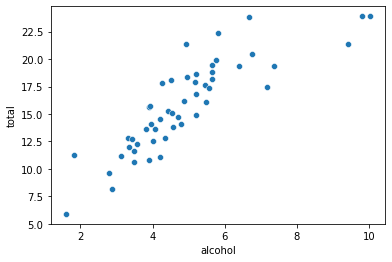

In [112]:
sns.scatterplot(x='alcohol', y='total', data=df_crashes);

### Create ML Model with Python

In [129]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=df_crashes[['alcohol']], y=df_crashes['total'])
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.96888653310057,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

$$
(total\_accidents) = 5.85 + 2.03 \cdot (alcohol)
$$

In [130]:
df_pred = df_crashes[['alcohol', 'total']].copy()
df_pred['total_pred'] = model.predict(X=df_crashes[['alcohol']])
df_pred

,alcohol,total,total_pred
0,5.640,18.8,17.321112
1,4.525,18.1,15.054867
...,...,...,...
49,4.554,13.8,15.113810
50,5.568,17.4,17.174771


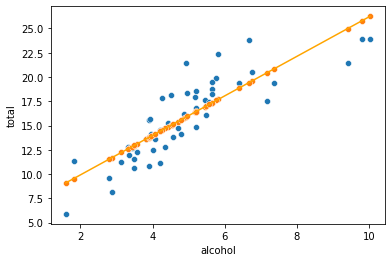

In [128]:
sns.scatterplot(x='alcohol', y='total', data=df_crashes)
sns.scatterplot(x='alcohol', y='total_pred', data=df_pred)
sns.lineplot(x='alcohol', y='total_pred', data=df_pred, color='orange');

## How does [Scikit-learn](https://scikit-learn.org/stable/) library works?

1. Models
    1. **Regression**
    2. **Classification**
    3. **Clustering**
2. Techniques
    4. Preprocessing
    5. Model Selection
    6. Dimensionality Reduction

## Create any ML Algorithm with any Data Table

### Regression Models

In [113]:
df_tips = sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [131]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X=df_tips[['total_bill']], y=df_tips['tip'])
df_pred = df_tips[['total_bill', 'tip']].copy()
df_pred['tip_pred'] = model_lr.predict(X=df_pred[['total_bill']])
df_pred

,total_bill,tip,tip_pred
0,16.99,1.01,2.704636
1,10.34,1.66,2.006223
...,...,...,...
242,17.82,1.75,2.791807
243,18.78,3.00,2.892630


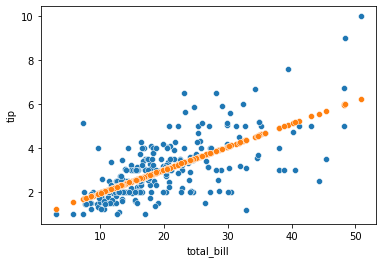

In [53]:
sns.scatterplot(x='total_bill', y='tip', data=df_pred)
sns.scatterplot(x='total_bill', y='tip_pred', data=df_pred);

### Classification Models

In [132]:
df_mpg = sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


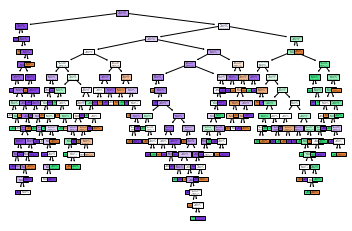

In [133]:
from sklearn.tree import DecisionTreeClassifier

features = df_mpg[['acceleration', 'mpg']].copy()
target = df_mpg['origin']
model_dt = DecisionTreeClassifier()
model_dt.fit(X=features, y=target)

from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

In [134]:
df_pred = df_mpg[['acceleration', 'mpg', 'origin']].copy()
df_pred['origin_pred'] = model_dt.predict(X=features)
df_pred.sample(10)

,acceleration,mpg,origin,origin_pred
57,15.5,24.0,japan,europe
395,11.6,32.0,usa,usa
190,12.8,14.5,usa,usa
109,19.5,21.0,usa,europe
293,14.0,31.9,europe,europe
118,15.5,24.0,europe,europe
157,14.0,15.0,usa,usa
328,21.8,30.0,europe,europe
307,12.9,26.8,usa,usa
291,15.0,19.2,usa,usa


### Clustering Models

In [135]:
df_crashes = sns.load_dataset('car_crashes')
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
...,...,...,...,...,...,...,...,...
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


In [136]:
from sklearn.cluster import KMeans

model_km = KMeans(n_clusters=3)
features = df_crashes[['alcohol', 'ins_losses']].copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
model_km.fit(X=features_scaled)
df_pred = features.copy()
df_pred['cluster'] = model_km.predict(X=features_scaled)
df_pred

,alcohol,ins_losses,cluster
0,5.640,145.08,1
1,4.525,133.93,2
...,...,...,...
49,4.554,106.62,2
50,5.568,122.04,2


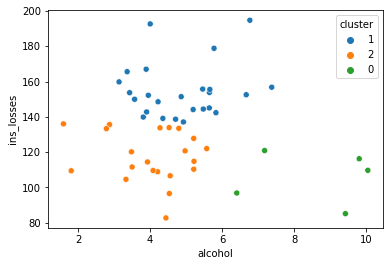

In [137]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, hue=df_pred.cluster.astype(str));